<a href="https://colab.research.google.com/github/pro8mari/code-practice/blob/main/LangGraph_Sequential_Agent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install -U langgraph


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 156.8/156.8 kB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.1/46.1 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 469.9/469.9 kB 23.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.8/56.8 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.6/207.6 kB 15.1 MB/s eta 0:00:00
  Attempting uninstall: langchain-core
    Found existing installation: langchain-core 0.3.79
    Uninstalling langchain-core-0.3.79:
      Successfully uninstalled langchain-core-0.3.79
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
langchain 0.3.27 requires langchain-core<1.0.0,>=0.3.72, but you have langchain-core 1.0.3 which is incompatible.


In [2]:
from typing import TypedDict
from langgraph.graph import StateGraph

In [ ]:
class AgentState(TypedDict):
  name: str
  age: str
  final: str

In [ ]:
def first_node(state: AgentState)-> AgentState:
  """This is the first node"""
  state['final'] = f'Hi {state["name"]}'
  return state

def second_node(state: AgentState)-> AgentState:
  """This is the second node"""
  state['final'] = state['final'] + f'Your age is {state["age"]} years old'
  return state

In [ ]:
graph = StateGraph(AgentState)
graph.add_node('first_node', first_node)
graph.add_node('second_node',second_node)

graph.set_entry_point('first_node')
graph.add_edge('first_node','second_node')
graph.set_finish_point('second_node')

app = graph.compile()

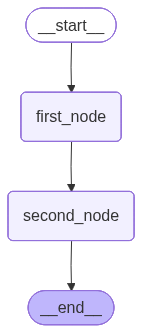

In [ ]:
from IPython.display import Image,display
display(Image(app.get_graph().draw_mermaid_png()))

Task.

Take a user’s name, age, and skills.

Pass the data through three nodes:

Node 1: Add a greeting with the name.

Node 2: Add the user’s age.

Node 3: List the user’s skills.

Combine everything into one message in result, e.g.:

“Linda, welcome to the system! You are 31 years old! You have skills in: Python, Machine Learning, and LangGraph.”

In [4]:
class AgentState(TypedDict):
  name: str
  age: str
  skills: list[str]
  result: str

In [36]:
def greeting_node(state: AgentState)-> AgentState:
  """First node: greeting"""
  state['result'] = f'{state["name"]}, welcome to the system!'
  return state

def add_age_node(state: AgentState)-> AgentState:
  """Second node: age"""
  state['result'] += f'You are {state["age"]} years old!'
  return state

def add_skills_node(state: AgentState)-> AgentState:
  """Third node: skills"""
  skills_str = ",".join(state['skills'])
  state['result'] += f'You have skills in {skills_str}.'
  return state

In [37]:
graph = StateGraph(AgentState)
graph.add_node('greeting_node', greeting_node)
graph.add_node('add_age_node', add_age_node)
graph.add_node('add_skills_node', add_skills_node)

graph.set_entry_point('greeting_node')
graph.add_edge('greeting_node','add_age_node')
graph.add_edge('add_age_node','add_skills_node')
graph.set_finish_point('add_skills_node')

app = graph.compile()

In [38]:
result = app.invoke({
    "name": "Linda",
    "age": "31",
    "skills": ["Python", "Machine Learning", "LangGraph"]
})
print(result["result"])

Linda, welcome to the system!You are 31 years old!You have skills in Python,Machine Learning,LangGraph.
